# Principal Component Analysis (PCA) - Iris Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import preprocessing     

In [2]:
df = pd.read_csv('iris_dataset.csv') 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X = df[features]

In [4]:
X_scaled = preprocessing.scale(X) 

In [5]:
pd.DataFrame(data = X_scaled, columns = features) 

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


---

Perform PCA and get a new coordinate system with 4 coordinates

We call these new coordinates 'principal components' - PC1, PC2, PC3, PC4

---

In [6]:
pca = PCA()    

pca.fit(X_scaled)

PCA()

---

Find the percentage of variance along each PC

---

In [7]:
per_var = np.round(pca.explained_variance_ratio_*100, 2)
per_var

array([72.77, 23.03,  3.68,  0.52])

----

Note that the first two components explain almost 96% of the variation of our data

That means we'll use only PC1 and PC2, 
so we'll reduce the dimensionality of our data from 4 original dimensions to 2 dimensions

---

---

We create a bar chart for the above percentage of explained variance along each PC

Data scientists refer to this chart as "Scree Plot"

---

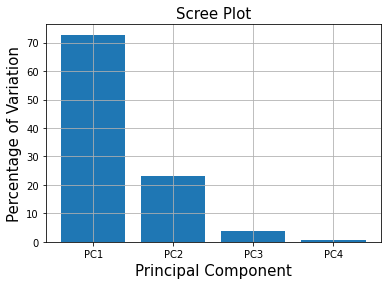

In [8]:
princ_comp = ['PC' + str(x) for x in range(1, 5)]

plt.bar(x = range(1, 5), height = per_var, tick_label = princ_comp)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.grid();

---

We call function ```pca.components_``` to see how each PC is obtained
as a linear combination of the original coordinates

For example, here PC1 = 0.522 * sepal_length + 0.372 * sepal_width - 0.721 * petal_length - 0.262 * petal_width

---

In [9]:
pd.DataFrame(data = pca.components_, columns = princ_comp, index = features)

,PC1,PC2,PC3,PC4
sepal_length,0.522372,-0.263355,0.581254,0.565611
sepal_width,0.372318,0.925556,0.021095,0.065416
petal_length,-0.721017,0.242033,0.140892,0.633801
petal_width,-0.261996,0.124135,0.801154,-0.523546


----

We use ```pca.transform``` to see how the projected data looks like in the new coordinate system

This will be used later to plot the projected data in the first two coordinates PC1, PC2

---

In [10]:
pca_data = pca.transform(X_scaled)

pca_df = pd.DataFrame(pca_data, columns = princ_comp)

pca_df

,PC1,PC2,PC3,PC4
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397
...,...,...,...,...
145,1.870522,0.382822,0.254532,-0.388890
146,1.558492,-0.905314,-0.025382,-0.221322
147,1.520845,0.266795,0.179277,-0.118903
148,1.376391,1.016362,0.931405,-0.024146


In [11]:
# We delete PC3 and PC4 because we decided to use only the first two components

del pca_df['PC3'], pca_df['PC4']

pca_df

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [12]:
# We add to the previous data frame the labels 

projected_data = pd.concat([pca_df, df[['species']]], axis = 1)

projected_data

,PC1,PC2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


---

We plot the data points in this 2-dimensional coordinates system given by PC1 and PC2 

We also color each data point according to its label

---

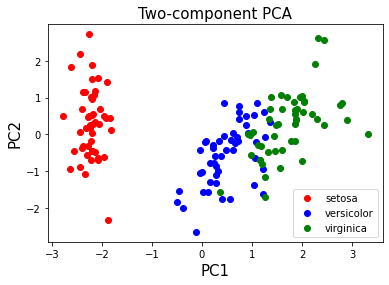

In [13]:
labels = ["setosa", "versicolor", "virginica"]
colors = ["r", "b", "g"]

for label, color in zip(labels, colors):
    index = projected_data["species"]==label
    plt.scatter(projected_data.loc[index, "PC1"],
                projected_data.loc[index, "PC2"],
                c = color)
    
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.title("Two-component PCA", fontsize = 15)
plt.legend(labels);

---

We see that the data points are classified well accordining to PC1 and PC2 

For example, if someone gives a new flower with measurements for sepal_length, sepal_width, petal_length and petal_width,
we can compute PC1 and PC2 for that flower using the table below the scree plot which gives how each PC is obtained using
the original coordinates (measurements). If it happens that for this flower PC1=-2, clearly, from this graph above, that 
flower is among the red flowers and we then know that it is "setosa".

---